In [2]:
import numpy as np

np.random.seed(42)
m = 100
X = 2 * np.random.rand(m, 1)
y = 4 + 3 * X + np.random.randn(m, 1)

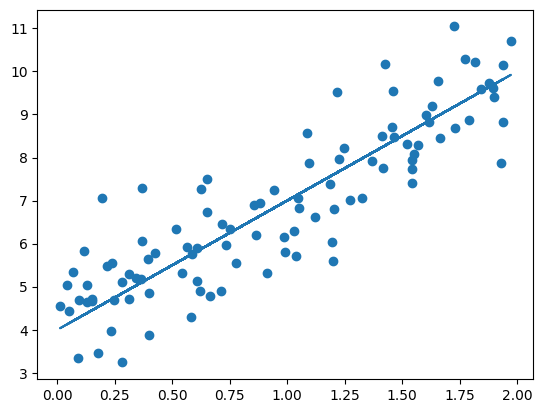

In [3]:
import matplotlib.pyplot as plt

plt.scatter(X, y)
plt.plot(X, 4 + 3 * X)
plt.show()

In [4]:
from sklearn.preprocessing import add_dummy_feature

X_b = add_dummy_feature(X)
theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y
theta_best

array([[4.21509616],
       [2.77011339]])

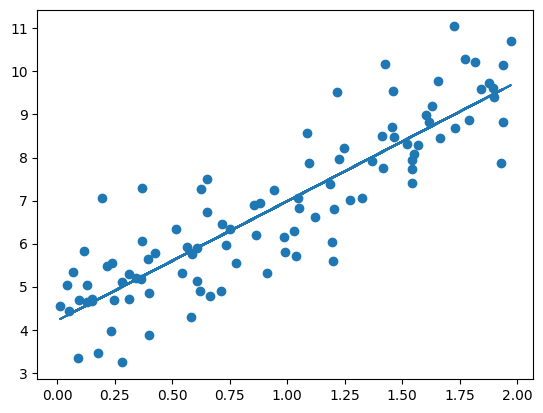

In [5]:
plt.scatter(X, y)
plt.plot(X, theta_best[0] + theta_best[1] * X)
plt.show()

In [6]:
X_new = np.array([[0], [2]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[4.21509616],
       [9.75532293]])

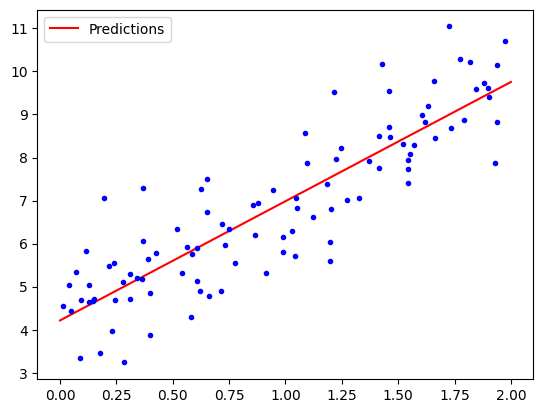

In [7]:
plt.plot(X_new, y_predict, 'r-', label='Predictions')
plt.plot(X, y, 'b.')
plt.legend()
plt.show()

In [8]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.21509616]), array([[2.77011339]]))

In [9]:
lin_reg.predict(X_new)

array([[4.21509616],
       [9.75532293]])

In [10]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
theta_best_svd

array([[4.21509616],
       [2.77011339]])

In [11]:
np.linalg.pinv(X_b) @ y

array([[4.21509616],
       [2.77011339]])

In [12]:
eta = 0.1
n_epochs = 1000
m = len(X_b)

np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(n_epochs):
    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

theta

array([[4.21509616],
       [2.77011339]])

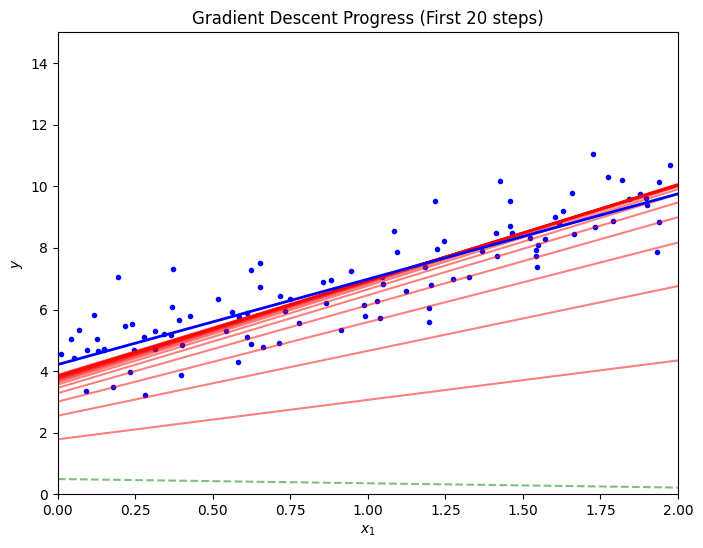

In [13]:
# 1. 先画出原始数据散点图
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'b.')    # b 决定了颜色是蓝色，. 决定了画的是散点图

# 2. 准备预测用的 X 坐标
# 我们取 0 和 2 两个点，连接成线即可
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]     # c_ 是 column concatenation 的缩写

# 3. 梯度下降并绘图
eta = 0.1
n_epochs = 1000
np.random.seed(42)
theta = np.random.randn(2, 1)

for epoch in range(1000):
    if epoch < 20:
        y_predict = X_new_b @ theta
        style = 'r-' if epoch > 0 else 'g--'     # r 表示红色, - 表示实线, g 表示绿色, -- 表示虚线
        plt.plot(X_new, y_predict, style, alpha=0.5)

    gradients = 2 / m * X_b.T @ (X_b @ theta - y)
    theta = theta - eta * gradients

# 4. 最后画出收敛后的最终直线
y_predict = X_new_b @ theta
plt.plot(X_new, y_predict, 'b-', linewidth=2, label='Final Model')

plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.axis([0, 2, 0, 15])
plt.title('Gradient Descent Progress (First 20 steps)')
plt.show()

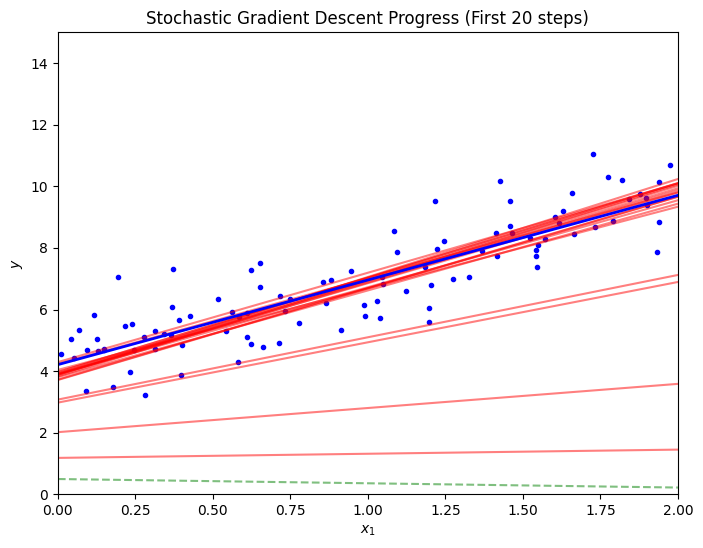

In [14]:
# 1. 先画出原始数据散点图
plt.figure(figsize=(8, 6))
plt.plot(X, y, 'b.')    # b 决定了颜色是蓝色，. 决定了画的是散点图

# 2. 准备预测用的 X 坐标
# 我们取 0 和 2 两个点，连接成线即可
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new]     # c_ 是 column concatenation 的缩写

# 3. 梯度下降并绘图
n_epochs = 50
t0, t1 = 5, 50  # learning schedule hyperparameters

def learning_schedule(t):
    return t0 / (t + t1)

np.random.seed(42)
theta = np.random.randn(2, 1)   # random initialization

for epoch in range(n_epochs):
    for iteration in range(m):
        if epoch == 0 and iteration < 20:
            y_predict = X_new_b @ theta
            style = 'r-' if iteration > 0 else 'g--'     # r 表示红色, - 表示实线, g 表示绿色, -- 表示虚线
            plt.plot(X_new, y_predict, style, alpha=0.5)

        random_index = np.random.randint(m)
        xi = X_b[random_index : random_index + 1]
        yi = y[random_index : random_index + 1]
        gradients = 2 * xi.T @ (xi @ theta - yi)
        eta = learning_schedule(epoch * m + iteration)  # epoch * m + iteration 实际上是在计算“总迭代次数”
        theta = theta - eta * gradients


# 4. 最后画出收敛后的最终直线
y_predict = X_new_b @ theta
plt.plot(X_new, y_predict, 'b-', linewidth=2, label='Final Model')

plt.xlabel('$x_1$')
plt.ylabel('$y$')
plt.axis([0, 2, 0, 15])
plt.title('Stochastic Gradient Descent Progress (First 20 steps)')
plt.show()

In [15]:
theta

array([[4.21076011],
       [2.74856079]])

In [16]:
from sklearn.linear_model import SGDRegressor

sgd_reg = SGDRegressor(max_iter=1000, tol=1e-5, penalty=None, eta0=0.01,
                       n_iter_no_change=100, random_state=42)
sgd_reg.fit(X, y.ravel())

sgd_reg.intercept_, sgd_reg.coef_

(array([4.21278812]), array([2.77270267]))

In [17]:
np.random.seed(42)
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X ** 2 + X + 2 + np.random.randn(m, 1)

In [18]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [19]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [20]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

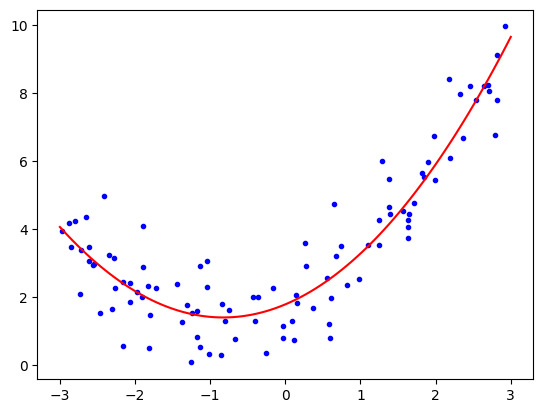

In [21]:
plt.plot(X, y, 'b.')

X_new = np.linspace(-3, 3, 100).reshape(m, 1)
y_predict = lin_reg.coef_[0][1] * X_new ** 2 + lin_reg.coef_[0][0] * X_new + lin_reg.intercept_[0]
plt.plot(X_new, y_predict, 'r-')

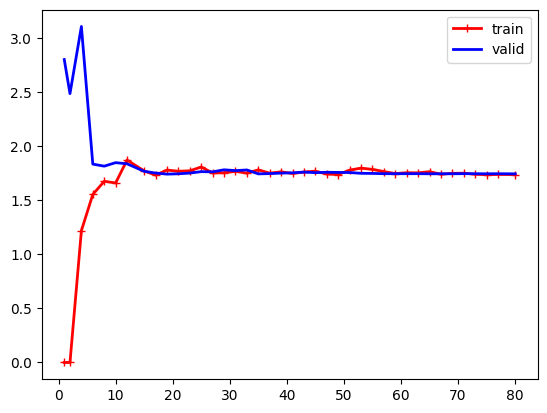

In [22]:
from sklearn.model_selection import learning_curve

train_sizes, train_scores, valid_scores = learning_curve(
    LinearRegression(), X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)
train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=2, label='valid')
plt.legend()

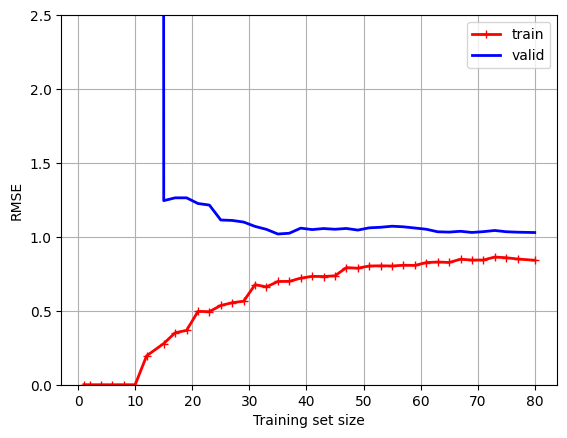

In [23]:
from sklearn.pipeline import make_pipeline

polynomial_regression = make_pipeline(
    PolynomialFeatures(degree=10, include_bias=False),
    LinearRegression()
)

train_sizes, train_scores, valid_scores = learning_curve(
    polynomial_regression, X, y, train_sizes=np.linspace(0.01, 1.0, 40), cv=5,
    scoring='neg_root_mean_squared_error'
)

train_errors = -train_scores.mean(axis=1)
valid_errors = -valid_scores.mean(axis=1)

plt.plot(train_sizes, train_errors, 'r-+', linewidth=2, label='train')
plt.plot(train_sizes, valid_errors, 'b-', linewidth=2, label='valid')
plt.ylim(0, 2.5) 
plt.xlabel("Training set size")
plt.ylabel("RMSE")
plt.legend()
plt.grid(True)
plt.show()

In [24]:
from sklearn.linear_model import Ridge

ridge_reg = Ridge(alpha=0.1, solver='cholesky')
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([4.82899748])

In [25]:
sgd_reg = SGDRegressor(penalty='l2', alpha=0.1 / m, tol=None,
                       max_iter=1000, eta0=0.01, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([4.82830117])

In [26]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([4.77621741])

In [27]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([4.78114505])

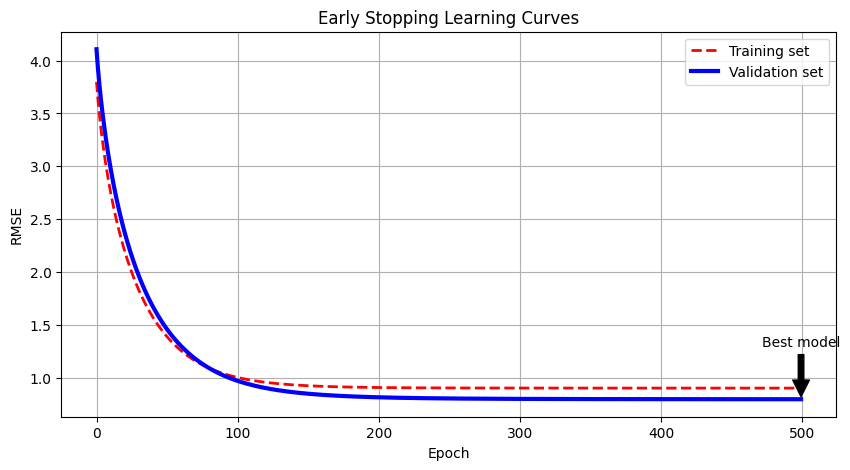

In [51]:
from copy import deepcopy
from sklearn.metrics import root_mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

X_train, X_valid, y_train, y_valid = train_test_split(
    X, y,
    test_size=0.2,    # 验证集占 20%
    random_state=42,  # 保证每次运行代码，拆分的结果都一样（这很重要！）
    shuffle=True      # 拆分前先打乱顺序，防止数据分布不均
)

preprocessiong = make_pipeline(PolynomialFeatures(degree=2, include_bias=False),
                               StandardScaler())
X_train_prep = preprocessiong.fit_transform(X_train)
X_valid_prep = preprocessiong.transform(X_valid)
sgd_reg = SGDRegressor(penalty=None, eta0=0.002, random_state=42)

n_epochs = 500
train_errors, val_errors = [], [] # 用于绘图
best_valid_rmse = float('inf')

for epoch in range(n_epochs):
    sgd_reg.partial_fit(X_train_prep, y_train)
    
    # 记录当前轮次的误差
    y_train_predict = sgd_reg.predict(X_train_prep)
    y_valid_predict = sgd_reg.predict(X_valid_prep)
    
    train_errors.append(root_mean_squared_error(y_train, y_train_predict))
    val_error = root_mean_squared_error(y_valid, y_valid_predict)
    val_errors.append(val_error)
    
    # 保存最佳模型
    if val_error < best_valid_rmse:
        best_valid_rmse = val_error
        best_epoch = epoch
        best_model = deepcopy(sgd_reg)

# --- 3. 绘制学习曲线 ---
plt.figure(figsize=(10, 5))
plt.plot(train_errors, "r--", linewidth=2, label="Training set")
plt.plot(val_errors, "b-", linewidth=3, label="Validation set")

# 标注最佳点
plt.annotate('Best model',
             xy=(best_epoch, best_valid_rmse),
             xytext=(best_epoch, best_valid_rmse + 0.5),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.05))

plt.xlabel("Epoch")
plt.ylabel("RMSE")
plt.legend()
plt.title("Early Stopping Learning Curves")
plt.grid(True)
plt.show()

In [52]:
# 获取权重（系数 theta_1 到 theta_n）
best_weights = best_model.coef_

# 获取偏置（截距 theta_0）
best_intercept = best_model.intercept_

print("最佳权重:", best_weights)
print("最佳截距:", best_intercept)

最佳权重: [1.64562182 1.53626858]
最佳截距: [3.30678442]


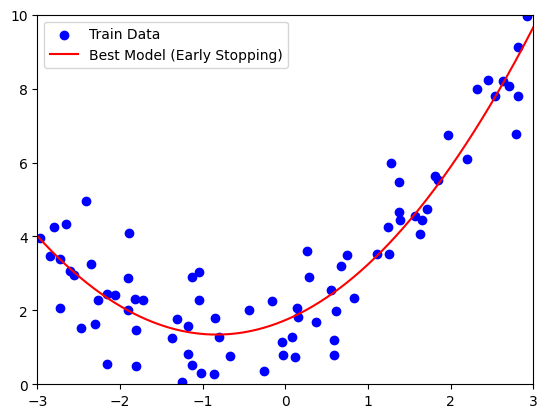

In [53]:
# 生成密集的点来画预测曲线
X_new = np.linspace(-3, 3, 500).reshape(-1, 1)
X_new_prep = preprocessiong.transform(X_new) # 注意：只transform，不fit
y_new_predict = best_model.predict(X_new_prep)

plt.scatter(X_train, y_train, color='blue', label='Train Data')
plt.plot(X_new, y_new_predict, 'r-', label='Best Model (Early Stopping)')
plt.axis([-3, 3, 0, 10])
plt.legend()
plt.show()